In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,God Lives in the Himalayas,2009
1,White Gold,1927
2,Stimulus,2004
3,Hypergraphia,2017
4,Wanted,2011


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [49]:
superhero_years = cast[(cast.character == "Batman") | (cast.character == "Superman")].groupby([cast.year, cast.character]).size().sort_index()
pivot_superhero = superhero_years.unstack()
new_table_superhero = pivot_superhero.fillna(value=0)

new_table_superhero['winner'] = new_table_superhero['Batman'] - new_table_superhero['Superman']
len(new_table_superhero[new_table_superhero.winner < 0])

13

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [50]:
len(new_table_superhero[new_table_superhero.winner > 0])

23

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

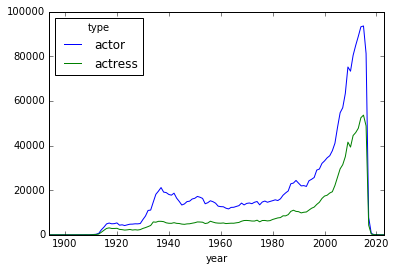

In [101]:
role_type_by_year = cast.groupby([cast.year, cast.type]).size().unstack().fillna(value = 0)

role_type_by_year.plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

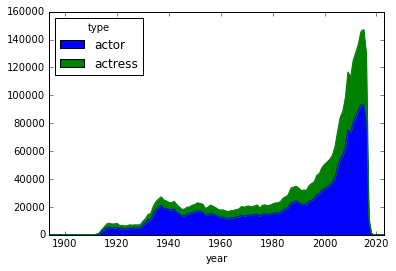

In [73]:
role_type_by_year.plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

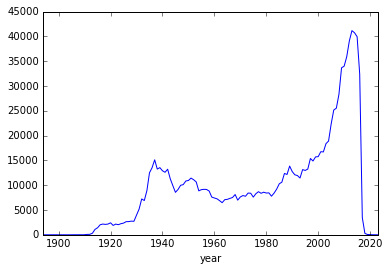

In [74]:
yearly_role_diff = role_type_by_year.actor - role_type_by_year.actress
yearly_role_diff.plot()

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

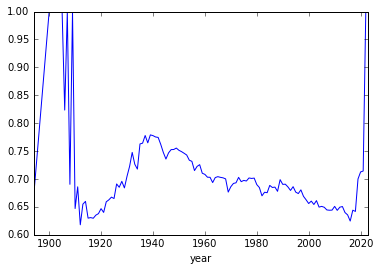

In [78]:
actors_roles = (role_type_by_year.actor / (role_type_by_year.actor + role_type_by_year.actress))
actors_roles.plot()

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

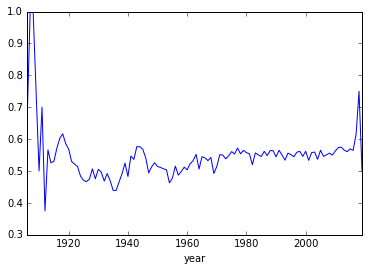

In [86]:
supporting_roles = cast[(cast.n == 2)].groupby([cast.year, cast.type]).size().unstack().fillna(value = 0)

actor_roles = (supporting_roles.actor / (supporting_roles.actor + supporting_roles.actress))
actor_roles.plot()

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

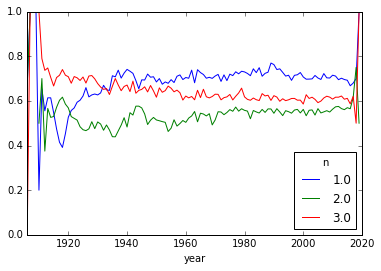

In [100]:
key_roles = cast[cast.n < 4].groupby([cast.year, cast.type, cast.n]).size().unstack('type').fillna(value = 0)

key_actor_roles = (key_roles.actor / (key_roles.actor + key_roles.actress)).unstack('n')

key_actor_roles.plot()
